In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize

In [24]:
# Load the dataset
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for the dataset
df = pd.DataFrame(data=np.c_[X, y], columns=feature_names + ['target'])

In [25]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

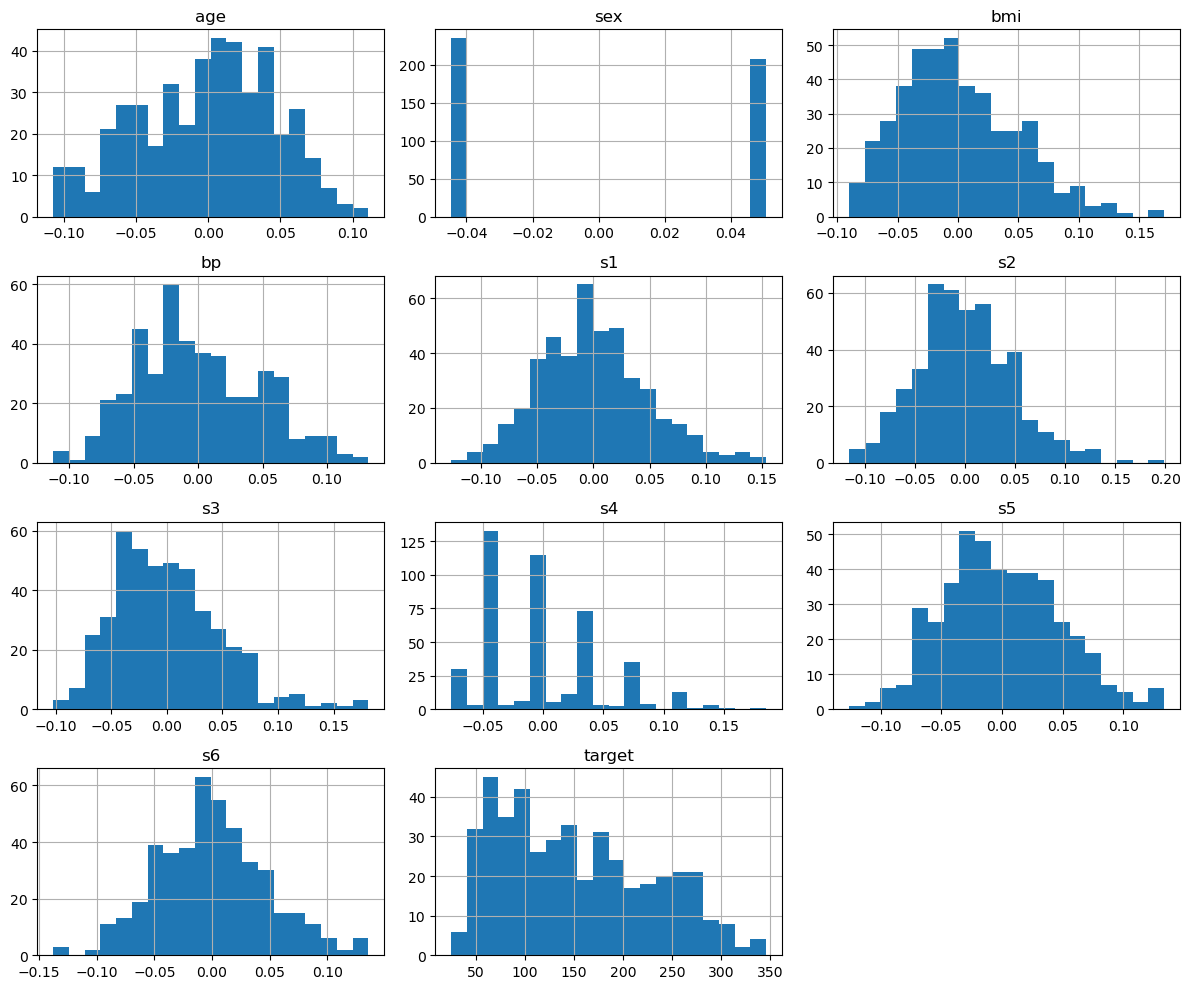

In [26]:
# Visualize the distributions of numerical features using histograms
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [27]:
# Perform standard scaling
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
df_standard_scaled = pd.DataFrame(X_standard_scaled, columns=feature_names)
standard_scaled_summary = df_standard_scaled.describe()

# Display the first few rows of scaled data
print("\nFirst few rows of Standard Scaled Data:")
print(df_standard_scaled.head())


First few rows of Standard Scaled Data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  
0 -0.054499  0.418531 -0.370989  
1 -0.830301 -1.436589 -1.938479  
2 -0.054499  0.060156 -0.545154  
3  0.721302  0.476983 -0.196823  
4 -0.054499 -0.672502 -0.980568  


In [28]:
# Perform min-max scaling
scaler_min_max = MinMaxScaler()
X_min_max_scaled = scaler_min_max.fit_transform(X)
df_min_max_scaled = pd.DataFrame(X_min_max_scaled, columns=feature_names)
min_max_scaled_summary = df_min_max_scaled.describe()

print("\nFirst few rows of Min-Max Scaled Data:")
print(df_min_max_scaled.head())


First few rows of Min-Max Scaled Data:
        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  
0  0.562217  0.439394  
1  0.222437  0.166667  
2  0.496578  0.409091  
3  0.572923  0.469697  
4  0.362385  0.333333  


In [29]:
from sklearn.preprocessing import Normalizer

# Perform L2 normalization
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=feature_names)

# Display the first few rows of normalized data
print("\nFirst few rows of Normalized Data:")
print(df_normalized.head())


First few rows of Normalized Data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.321006  0.427269  0.520142  0.184399 -0.372835 -0.293563 -0.365899   
1 -0.011662 -0.276615 -0.318951 -0.163134 -0.052351 -0.118742  0.461079   
2  0.657407  0.390597  0.342590 -0.043702 -0.351439 -0.263540 -0.249370   
3 -0.721104 -0.361444 -0.093880 -0.296788  0.098702  0.202338 -0.291780   
4  0.062770 -0.520554 -0.424272  0.255048  0.045883  0.181862  0.094943   

         s4        s5        s6  
0 -0.021855  0.167834 -0.148769  
1 -0.244714 -0.423405 -0.571327  
2 -0.019979  0.022052 -0.199848  
3  0.277784  0.183693 -0.075799  
4 -0.030228 -0.372999 -0.543867  


In [30]:
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Min-Max Scaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


In [38]:

from sklearn.metrics import mean_squared_error

# Initialize models
linear_model_minmax = LinearRegression()
linear_model_scaled = LinearRegression()

# Train models using unscaled, scaled, and normalized data
linear_model_minmax.fit(X_train_minmax, y_train)
linear_model_scaled.fit(X_train_standard, y_train)  

# Make predictions
y_pred_minmax = linear_model_minmax.predict(X_test_minmax)
y_pred_scaled = linear_model_scaled.predict(X_test_standard)

# Calculate Mean Squared Error (MSE)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

# Display MSE for each model
print("Mean Squared Error (minmax):", mse_minmax)
print("Mean Squared Error (Scaled):", mse_scaled)





Mean Squared Error (minmax): 2900.1936284934827
Mean Squared Error (Scaled): 2900.193628493482
